In [1]:
import folium

In [2]:
from folium import plugins

In [3]:
import pandas as pd

In [4]:
import geopandas as gpd

In [5]:
data = pd.read_excel('donnée_fatou_mané/TABLEAU BASE DE DONNEES FINAL.xlsx')
data

PK(km)        X(m)         Y(m)    Z(m)                   Lieux  \
0    PK0.00  304636.353  1654241.354  56.393     Carrefour Tivaouane   
1    PK0.01  304581.496  1654296.400  56.828                     NaN   
2    PK0.02  304515.093  1654365.152  56.987                     NaN   
3    PK0.03  304418.440  1654465.606  56.490                     NaN   
4    PK0.04  304372.457  1654513.373  56.186                     NaN   
..      ...         ...          ...     ...                     ...   
145  PK21.8  298448.159  1673788.331  33.629                     NaN   
146  PK21.9  298405.128  1673818.517  30.473               ICS Mboro   
147    PK22  298279.782  1673895.912  31.191                     NaN   
148  PK22.2  298109.687  1674001.115  28.628                     NaN   
149  PK22.3  298058.880  1674036.743  27.721  Station Shell de Mboro   

     Nombre d'accidents  Victimes    Virages Visibilté  Linéaire  \
0                 111.0     133.0     Absent  Présente  Respecté   
1                   NaN       NaN     Absent  Présente  Respecté   
2                   NaN       NaN     Absent  Présente  Respecté   
3                   NaN       NaN     Absent  Présente  Respecté   
4                   NaN       NaN     Absent  Présente  Respecté   
..                  ...       ...        ...       ...       ...   
145                 NaN       NaN  Dangereux   Absente    Absent   
146                 7.0      12.0  Dangereux   Absente    Absent   
147                 NaN       NaN     Absent   Absente  Respecté   
148                 NaN       NaN     Absent   Absente  Respecté   
149                22.0      31.0     Absent   Absente  Respecté   

    Signalisations Ralentisseurs  
0         Présente        Absent  
1          Absente        Absent  
2          Absente        Absent  
3          Absente       Présent  
4          Absente        Absent  
..             ...           ...  
145        Absente        Absent  
146        Absente        Absent  
147        Absente        Absent  
148        Absente       Présent  
149        Absente       Présent  

[150 rows x 12 columns]

In [6]:
gdf = gpd.GeoDataFrame(
    data, crs=32628, geometry=gpd.points_from_xy(data['X(m)'], data['Y(m)']))

In [7]:
gdf.to_crs(epsg=4326,inplace=True)
gdf['color']=['red' if float(i)/(12*5) > 0.5 else 'green' for i in gdf["Victimes"]]

In [8]:
gdf

PK(km)        X(m)         Y(m)    Z(m)                   Lieux  \
0    PK0.00  304636.353  1654241.354  56.393     Carrefour Tivaouane   
1    PK0.01  304581.496  1654296.400  56.828                     NaN   
2    PK0.02  304515.093  1654365.152  56.987                     NaN   
3    PK0.03  304418.440  1654465.606  56.490                     NaN   
4    PK0.04  304372.457  1654513.373  56.186                     NaN   
..      ...         ...          ...     ...                     ...   
145  PK21.8  298448.159  1673788.331  33.629                     NaN   
146  PK21.9  298405.128  1673818.517  30.473               ICS Mboro   
147    PK22  298279.782  1673895.912  31.191                     NaN   
148  PK22.2  298109.687  1674001.115  28.628                     NaN   
149  PK22.3  298058.880  1674036.743  27.721  Station Shell de Mboro   

     Nombre d'accidents  Victimes    Virages Visibilté  Linéaire  \
0                 111.0     133.0     Absent  Présente  Respecté   
1                   NaN       NaN     Absent  Présente  Respecté   
2                   NaN       NaN     Absent  Présente  Respecté   
3                   NaN       NaN     Absent  Présente  Respecté   
4                   NaN       NaN     Absent  Présente  Respecté   
..                  ...       ...        ...       ...       ...   
145                 NaN       NaN  Dangereux   Absente    Absent   
146                 7.0      12.0  Dangereux   Absente    Absent   
147                 NaN       NaN     Absent   Absente  Respecté   
148                 NaN       NaN     Absent   Absente  Respecté   
149                22.0      31.0     Absent   Absente  Respecté   

    Signalisations Ralentisseurs                    geometry  color  
0         Présente        Absent  POINT (-16.81657 14.95584)    red  
1          Absente        Absent  POINT (-16.81709 14.95634)  green  
2          Absente        Absent  POINT (-16.81771 14.95695)  green  
3          Absente       Présent  POINT (-16.81861 14.95785)  green  
4          Absente        Absent  POINT (-16.81905 14.95828)  green  
..             ...           ...                         ...    ...  
145        Absente        Absent  POINT (-16.87564 15.13201)  green  
146        Absente        Absent  POINT (-16.87604 15.13228)  green  
147        Absente        Absent  POINT (-16.87721 15.13297)  green  
148        Absente       Présent  POINT (-16.87880 15.13391)  green  
149        Absente       Présent  POINT (-16.87928 15.13422)    red  

[150 rows x 14 columns]

In [9]:
tronçon=gpd.read_file('donnée_fatou_mané/tronçon_complet.geojson')
tronçon.to_crs(epsg=4326, inplace=True)

In [10]:
pk=gpd.read_file('donnée_fatou_mané/Points_km.geojson')
pk.to_crs(epsg=4326, inplace=True)

In [11]:
tronçon

begin     end  Lineaire Alignement Signalisat Ralentisse  Accidents  \
0   PK0.00  PK01.7    1864.0   Respecte   Presente    Present        162   
1   PK01.7  PK02.2       NaN   Respecte    Absente    Present         58   
2   PK02.2  PK03.3    1453.0   Respecte    Absente    Present         23   
3   PK03.3  PK03.5       NaN       None       None     Absent         23   
4   PK03.8    PK04       NaN       None    Absente     Absent         35   
5   PK03.5  PK03.8     366.0   Respecte    Absente    Present         23   
6     PK04  PK04.2     137.0   Respecte    Absente    Present         35   
7   PK04.2  PK04.5       NaN       None    Absente     Absent         35   
8   PK04.5    PK05     534.0   Respecte    Absente    Present         35   
9     PK05  PK05.3       NaN       None    Absente     Absent         35   
10  PK05.3  PK05.6     314.0   Respecte    Absente    Present         35   
11  PK05.6    PK06       NaN       None    Absente     Absent         35   
12    PK06  PK08.6    3136.0  Dangereux    Absente     Absent         47   
13  PK08.6  PK08.9       NaN       None    Absente    Present         12   
14  PK08.9  PK10.5    1739.0   Respecte    Absente    Present         12   
15  PK10.5  PK10.9       NaN       None    Absente    Present         12   
16  PK10.9  PK12.8    1919.0   Respecte    Absente    Present         12   
17  PK12.8  PK13.7       NaN       None    Absente     Absent         30   
18  PK13.7  PK14.1     808.0   Respecte    Absente     Absent         27   
19  PK14.1  PK14.6       NaN       None    Absente     Absent         27   
20  PK14.6  PK19.7    5575.0  Dangereux    Absente    Present         50   
21  PK19.7  PK19.9       NaN       None    Absente     Absent         19   
22  PK19.9  PK21.6    1806.0   Respecte    Absente    Present         36   
23  PK21.6    PK22       NaN       None    Absente     Absent         24   
24    PK22  PK22.3     406.0   Respecte    Absente    Present         29   

    Victimes      Annee         Nom  Rayon(m)     Virage Visibilite  \
0        204  2016-2020   Tronçon 1       NaN       None   Presente   
1         71  2016-2020   Tronçon 2     516.0   Respecte    Absente   
2         29  2016-2020   Tronçon 3       NaN       None       None   
3         29  2016-2020   Tronçon 4    1112.0  Dangereux    Absente   
4         57  2016-2020   Tronçon 7     574.0   Respecte    Absente   
5         29  2016-2020   Tronçon 6       NaN       None   Respecte   
6         57  2016-2020   Tronçon 8       NaN       None   Presente   
7         57  2016-2020   Tronçon 9     637.0   Respecte    Absente   
8         57  2016-2020  Tronçon 10       NaN       None   Respecte   
9         57  2016-2020  Tronçon 11    2970.0  Dangereux    Absente   
10        57  2016-2020  Tronçon 12       NaN       None   Respecte   
11        57  2016-2020  Tronçon 13     477.0   Respecte    Absente   
12        79  2016-2020  Tronçon 14       NaN       None    Absente   
13        22  2016-2020  Tronçon 15     477.0   Respecte       None   
14        22  2016-2020  Tronçon 16       NaN       None   Presente   
15        22  2016-2020  Tronçon 17     461.0   Respecte    Absente   
16        22  2016-2020  Tronçon 18       NaN       None   Presente   
17        90  2016-2020  Tronçon 19     975.0   Respecte    Absente   
18        58  2016-2020  Tronçon 20       NaN       None   Presente   
19        58  2016-2020  Tronçon 21       NaN  Dangereux    Absente   
20       108  2016-2020  Tronçon 22       NaN       None    Absente   
21        40  2016-2020  Tronçon 23     318.0   Respecte    Absente   
22        54  2016-2020  Tronçon 24       NaN       None   Presente   
23        36  2016-2020  Tronçon 25     226.0  Dangereux    Absente   
24        43  2016-2020  Tronçon 26       NaN       None   Presente   

                                             geometry  
0   MULTILINESTRING Z ((-16.81657 14.95584 56.3930...  
1   MULTILINESTRING Z ((-16.82887 14.96774 60.7260...  
2   MULTILINE

In [12]:
pk

PK(km)        X(m)         Y(m)    Z(m)  \
0    PK0.00  304636.353  1654241.354  56.393   
1    PK0.01  304581.496  1654296.400  56.828   
2    PK0.02  304515.093  1654365.152  56.987   
3    PK0.03  304418.440  1654465.606  56.490   
4    PK0.04  304372.457  1654513.373  56.186   
..      ...         ...          ...     ...   
145  PK21.8  298448.159  1673788.331  33.629   
146  PK21.9  298405.128  1673818.517  30.473   
147    PK22  298279.782  1673895.912  31.191   
148  PK22.2  298109.687  1674001.115  28.628   
149  PK22.3  298058.880  1674036.743  27.721   

                                  geometry  
0    POINT Z (-16.81657 14.95584 56.39300)  
1    POINT Z (-16.81709 14.95634 56.82800)  
2    POINT Z (-16.81771 14.95695 56.98700)  
3    POINT Z (-16.81861 14.95785 56.49000)  
4    POINT Z (-16.81905 14.95828 56.18600)  
..                                     ...  
145  POINT Z (-16.87564 15.13201 33.62900)  
146  POINT Z (-16.87604 15.13228 30.47300)  
147  POINT Z (-16.87721 15.13297 31.19100)  
148  POINT Z (-16.87880 15.13391 28.62800)  
149  POINT Z (-16.87928 15.13422 27.72100)  

[150 rows x 5 columns]

In [13]:
my_map_1 = folium.Map(location=(14.5,-15.5), min_zoom=7, zoom_start= 7,max_zoom=28,control_scale =True)

for _,r in tronçon.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           name=r['Nom'],
                           style_function=lambda x: {'Color': 'yellowgreen','weight': '10'})
    folium.Tooltip(r['Nom']).add_to(geo_j)
   
    folium.Popup(f'''
                        <h4 style= "color: darkgreen; font-weight: bold;"> Tronçon :{r['begin']} à {r['end']}</h4>
                        <ul>
                        <li> <b style= "color: darkgreen; font-weight: bold;">Tracé:</b> {f"Linéaire: {r['Lineaire']}m" if not pd.isnull(r['Lineaire']) else f"Rayon-Virage: {r['Rayon(m)']}m"}</li>
                        
                        <li>{[f"Alignement: {r['Alignement']}" if not pd.isnull(r['Alignement']) else f"Virage: {r['Virage']}m"][0]} </li>
                        <li> <b style= "color: red; font-weight: bold;">Accidents:</b> {r['Accidents']} </li>
                        <li> <b style= "color: red; font-weight: bold;">Victimes</b> {r['Victimes']}</li>
                        <li> <b>Signalisation :</b> {r['Signalisat']}</li>
                        <li> <b>Ralentisseurs:</b> {r['Ralentisse']}</li>
                        <li> <b>Visibilite:</b> {r['Visibilite']}</li>
                    
                    </ul>''').add_to(geo_j)
    geo_j.add_to(my_map_1)

for a,r in pk.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo_ = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j_ = sim_geo.to_json()
    geo_j_ = folium.GeoJson(data=geo_j_,
                           name=r['PK(km)'])
                           #style_function=lambda x: {'fillColor': 'lightgreen'})
    folium.Tooltip(r['PK(km)']).add_to(geo_j_)
                           
    folium.Marker(location=[r['geometry'].y,r['geometry'].x],
                    icon =folium.Icon(color=gdf.iloc[a]['color'],icon = 'bus',prefix= 'fa')).add_to(geo_j_)
                         
    folium.Popup(f'''<h5 style= "color: darkgreen; font-weight: bold;">{r['PK(km)']}</h5>
                    <ul>
                        <li> <b>X =</b> {r['X(m)']} m </li>
                        <li> <b>Y=</b> {r['Y(m)']} m </li>
                        <li> <b>Z=</b> {r['Z(m)']} m</li>
                    </ul>''').add_to(geo_j_)
    geo_j_.add_to(my_map_1)
# # add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(my_map_1)
my_map_1

In [14]:
plugins.Draw(export=True).add_to(my_map_1)
plugins.Fullscreen(position='bottomleft').add_to(my_map_1)
plugins.MeasureControl(position='bottomleft').add_to(my_map_1)
plugins.Search(folium.GeoJson('donnée_fatou_mané/Points_km.geojson'),geom_type='Point').add_to(my_map_1)

my_map_1

In [18]:
my_map_1.save('webmapp_ROUTE DE MBORO.html')

In [19]:
list_point = [(i[0],i[1]) for i in zip(gdf['geometry'].y,gdf['geometry'].x)]
line =folium.PolyLine(list_point,tooltip= 'Route de Mboro' )

In [20]:
line.add_to(my_map_1)

In [21]:
# show map types using layer control

# map
#map_layer_control = folium.Map(location=[38, -98], zoom_start=2)

# add tiles to map
#folium.raster_layers.TileLayer('Open Street Map').add_to(my_map_1)
#folium.raster_layers.TileLayer('Stamen Terrain').add_to(my_map_1)
#folium.raster_layers.TileLayer('Stamen Toner').add_to(my_map_1)
#folium.raster_layers.TileLayer(tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}.png',
                               #attr='Google',
                               # name='Google Satellite').add_to(my_map_1)
##folium.raster_layers.TileLayer('CartoDB Positron').add_to(my_map_1)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(my_map_1)



# plugin for mini map
minimap = plugins.MiniMap(toggle_display=True)

# add minimap to map
my_map_1.add_child(minimap)

# add scroll zoom toggler to map
#plugins.ScrollZoomToggler().add_to(my_map_1)

# add full screen button to map
plugins.Fullscreen(position='bottomleft').add_to(my_map_1)
# add geojson file to map
#folium.GeoJson('donnée_fatou_mané/tronçon_complet.geojson', name='tronçons').add_to(my_map_1)
#folium.GeoJson('donnée_fatou_mané/Points km.geojson', name='Points kilométriques').add_to(my_map_1)
# add layer control to show different maps
folium.LayerControl().add_to(my_map_1)
# display map
my_map_1

In [68]:
my_map_1.save('webmap_1.html')

In [39]:
# map
map_geojson = folium.Map( zoom_start=7)

# add geojson file to map
folium.GeoJsonPopup(GeoJson('donnée_fatou_mané/zones_protégées_du_sénégal.geojson',  style_function = lambda x: {'fillColor': '#0000ff' if
                             x['properties']['STATUT']=='Foret classee' else '#00ff00'},
               name='zones_protégées_du_sénégal').add_to(map_geojson)

# add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_geojson)

# display map
map_geojson

In [19]:
df = gpd.read_file('donnée_fatou_mané/zones_protéges/zones_protégées.shp')
df.to_crs(epsg=4326,inplace=True)
df.plot(figsize=(16,10))

<AxesSubplot:>

In [20]:
df

NOM  ZCODE                     STATUT  SUPERF_HA_  \
0    Iles Betanti      1              Foret classee    20000.00   
1     Ndioum-Walo      1              Foret classee     2690.00   
2         Thielao      1              Foret classee     2940.00   
3         Serpoli      1              Foret classee      661.00   
4           Lahel      1              Foret classee      158.00   
..            ...    ...                        ...         ...   
188          Ouli      1              Foret classee    14500.00   
189      Bala-Est      1              Foret classee     9540.00   
190  Niokolo-Koba      4              Parc National   399000.00   
191       Bem Bem      7     Reserve sylvopastorale    37700.00   
192     Gueumbeul      9  Reserve speciale de faune      559.24   

               ARRET_DEC1            ARRET_DEC2 ARRET_DEC3 ARRET_DEC4  \
0       238 du 22/01/1944                  None       None       None   
1           97 du 01/1939                  None       None       None   
2      2694 du 31/07/1941                  None       None       None   
3      2665 du 10/07/1947                  None       None       None   
4      2663 du 10/07/1947                  None       None       None   
..                    ...                   ...        ...        ...   
188    1120 du 29/03/1941                  None       None       None   
189    3159 du 08/08/1941                  None       None       None   
190  65-684 du 13/10/1965  68-551 du 14/05/1968       None       None   
191    4553 du 28/06/1956                  None       None       None   
192                  None                  None       None       None   

          OBSERV_1           OBSERV_2  \
0             None               None   
1       Gonakeraie   Amenagee en 1969   
2       Gonakeraie               None   
3       Gonakeraie               None   
4       Gonakeraie               None   
..             ...                ...   
188           None  Le long des rails   
189           None  Le long des rails   
190  Parc National           Kedougou   
191           None               None   
192           None               None   

                                              geometry  
0    POLYGON ((-16.50382 13.85044, -16.50216 13.851...  
1    POLYGON ((-14.66820 16.53079, -14.66933 16.524...  
2    POLYGON ((-14.61376 16.53954, -14.61573 16.544...  
3    POLYGON ((-14.59934 16.61701, -14.59822 16.618...  
4    POLYGON ((-14.64123 16.63430, -14.64160 16.633...  
..                                                 ...  
188  POLYGON ((-14.00018 13.90094, -14.00018 13.900...  
189  POLYGON ((-12.93231 13.99939, -12.93349 13.999...  
190  POLYGON ((-13.68691 12.99890, -13.70293 13.014...  
191  POLYGON ((-14.47026 15.03919, -14.46848 15.036...  
192  POLYGON ((-16.47160 15.92313, -16.47161 15.924...  

[193 rows x 11 columns]

In [21]:
style =str('''<style>
           h5 {
                color : green;
            }
            </style>''')
import numpy as np
import matplotlib.pyplot 

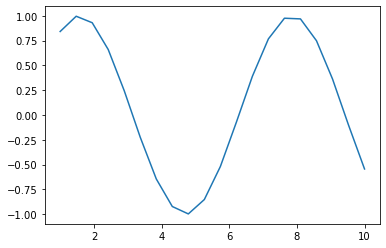

In [37]:
c = folium.Map(location=[14.77, -16.15], zoom_start=7,control_scale=True,tiles='CartoDB Dark_Matter')
# adding layer
folium.raster_layers.TileLayer('Open Street Map').add_to(c)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(c)


# plugin for mini map
minimap = plugins.MiniMap(toggle_display=True)

# add minimap to map
c.add_child(minimap)

#allow drawing
draw_=plugins.Draw(export=True)

#search=plugins.Search(my_map_1)
draw_.add_to(c)

# add full screen button to map
plugins.Fullscreen(position='bottomleft').add_to(c)

#x=np.linspace(1,10,20)
#y=np.sin(x)
#z =plt.plot(x,y)
#plt.show()
#print(z)

for _, r in df.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           name=r['NOM'],
                           style_function=lambda x: {'fillColor': 'lightgreen'})
    folium.Tooltip(r['NOM']).add_to(geo_j)
    folium.Popup(f'''
                    <div style="color:darkgreen; font-weight:bold;">{r['NOM']}</div>
                    <ul>
                        <li> <b style="color:blue; font-weight:bold">Statut:</b> {r['ARRET_DEC1']}</li>
                        <li> <b style="color:blue;font-weight:bold">Superficie:</b> {r['SUPERF_HA_']} ha </li>
                        <li> <b style="color:blue;font-weight:bold">Arrêt/ décret:</b> {r['ARRET_DEC1']}</li>
                    </ul>''').add_to(geo_j)
    geo_j.add_to(c)
    
# # add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(c)

c

In [30]:
c.save('zones_protégées_du_Sénégal__0.html')